In [11]:
from keras.datasets import mnist
from keras.models import Sequential, Model
from keras.layers import Dense, Dropout, Flatten, Activation, Input
from keras.layers import Conv2D, MaxPooling2D
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

# Load data

In [12]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Preprocess data

In [13]:
x_test_raw = x_test

In [14]:
x_train[x_train < 127] = 0
x_train[x_train >= 127] = 1

x_test[x_test < 127] = 0
x_test[x_test >= 127] = 1

In [15]:
y_train = tf.keras.utils.to_categorical(y_train)
y_test = tf.keras.utils.to_categorical(y_test)

# Define Model

In [16]:
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(28,28,1)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax', name='preds'))

In [17]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 conv2d_3 (Conv2D)           (None, 24, 24, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 12, 12, 64)       0         
 2D)                                                             
                                                                 
 dropout_2 (Dropout)         (None, 12, 12, 64)        0         
                                                                 
 flatten_1 (Flatten)         (None, 9216)              0         
                                                                 
 dense_1 (Dense)             (None, 128)               1179776   
                                                      

In [18]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train model

In [19]:
history = model.fit(x_train, y_train, batch_size=64, epochs=5)

Epoch 1/5
938/938 [==============================] - 20s 18ms/step - loss: 0.1863 - accuracy: 0.9425
Epoch 2/5
938/938 [==============================] - 17s 18ms/step - loss: 0.0698 - accuracy: 0.9785
Epoch 3/5
938/938 [==============================] - 17s 18ms/step - loss: 0.0515 - accuracy: 0.9836
Epoch 4/5
938/938 [==============================] - 17s 18ms/step - loss: 0.0398 - accuracy: 0.9873
Epoch 5/5
938/938 [==============================] - 17s 18ms/step - loss: 0.0341 - accuracy: 0.9891


In [20]:
metrics = history.history
loss_list = metrics['loss']
accuracy_list = metrics['accuracy']

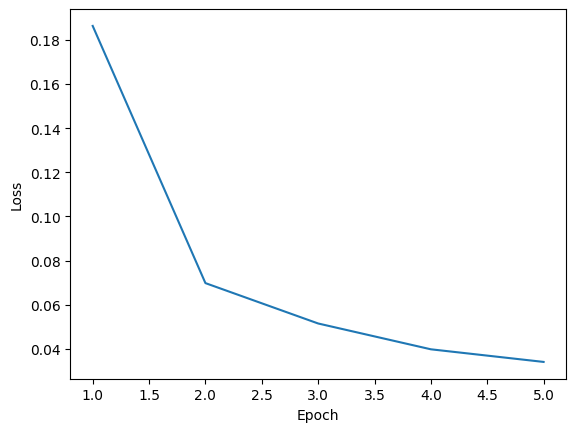

In [21]:
x = np.arange(1, 6, 1)
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.plot(x, loss_list)

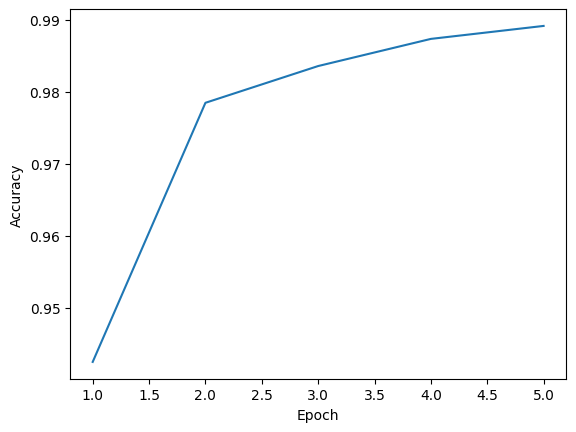

In [22]:
x = np.arange(1, 6, 1)
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.plot(x, accuracy_list)

# Evaluate model

In [23]:
model.evaluate(x_test, y_test)

313/313 [==============================] - 2s 7ms/step - loss: 0.0323 - accuracy: 0.9893


[0.03233335539698601, 0.989300012588501]

# Predict

In [24]:
y_pred = model.predict(x_test)

313/313 [==============================] - 1s 4ms/step


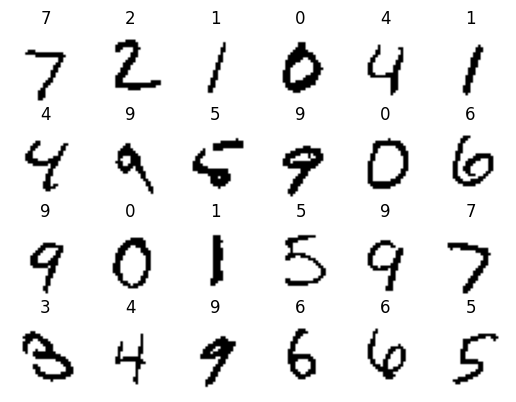

In [25]:
_, axes = plt.subplots(4, 6)

for i, ax in enumerate(axes.flat):
    ax.imshow(x_test_raw[i], cmap='gray_r')
    ax.set_title(np.argmax(y_pred[i]))
    ax.set_axis_off()